# Model Fitting

In [21]:
#! pip install batman-package

In [214]:
%%html
<style>
.dataframe th{
    font-size: 18px;
}
.dataframe td{
    font-size: 16px;
}
</style>

In [575]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatch
from matplotlib.offsetbox import AnchoredText as offbox
import batman
import scipy as spy
from scipy.interpolate import make_interp_spline
import pandas as pd
from statistics import stdev

Getting data tres data from text file and then plotting to double check for right data

In [576]:
def fluxBin(x, y, bins, c=0):
    avg_y = []
    avg_x = []
    avgErr_y = []

    if len(y) != len(x):
        raise ValueError("The lenght of lists are not equal.")
    else:
        for i in range(len(y)//bins):
            avg_y += [np.mean(y[c:c+bins])]
            avg_x += [np.mean(x[c:c+bins])]
            
            avgErr_y += [stdev(y[c:c+bins])]
            c += bins
            
    return avg_x, avg_y, avgErr_y

In [577]:
fluxL = np.load('TrES_fluxList.npy')
dateL = np.load('DateL.npy')
fluxErrL = np.load('Tres_fluxLErr.npy')

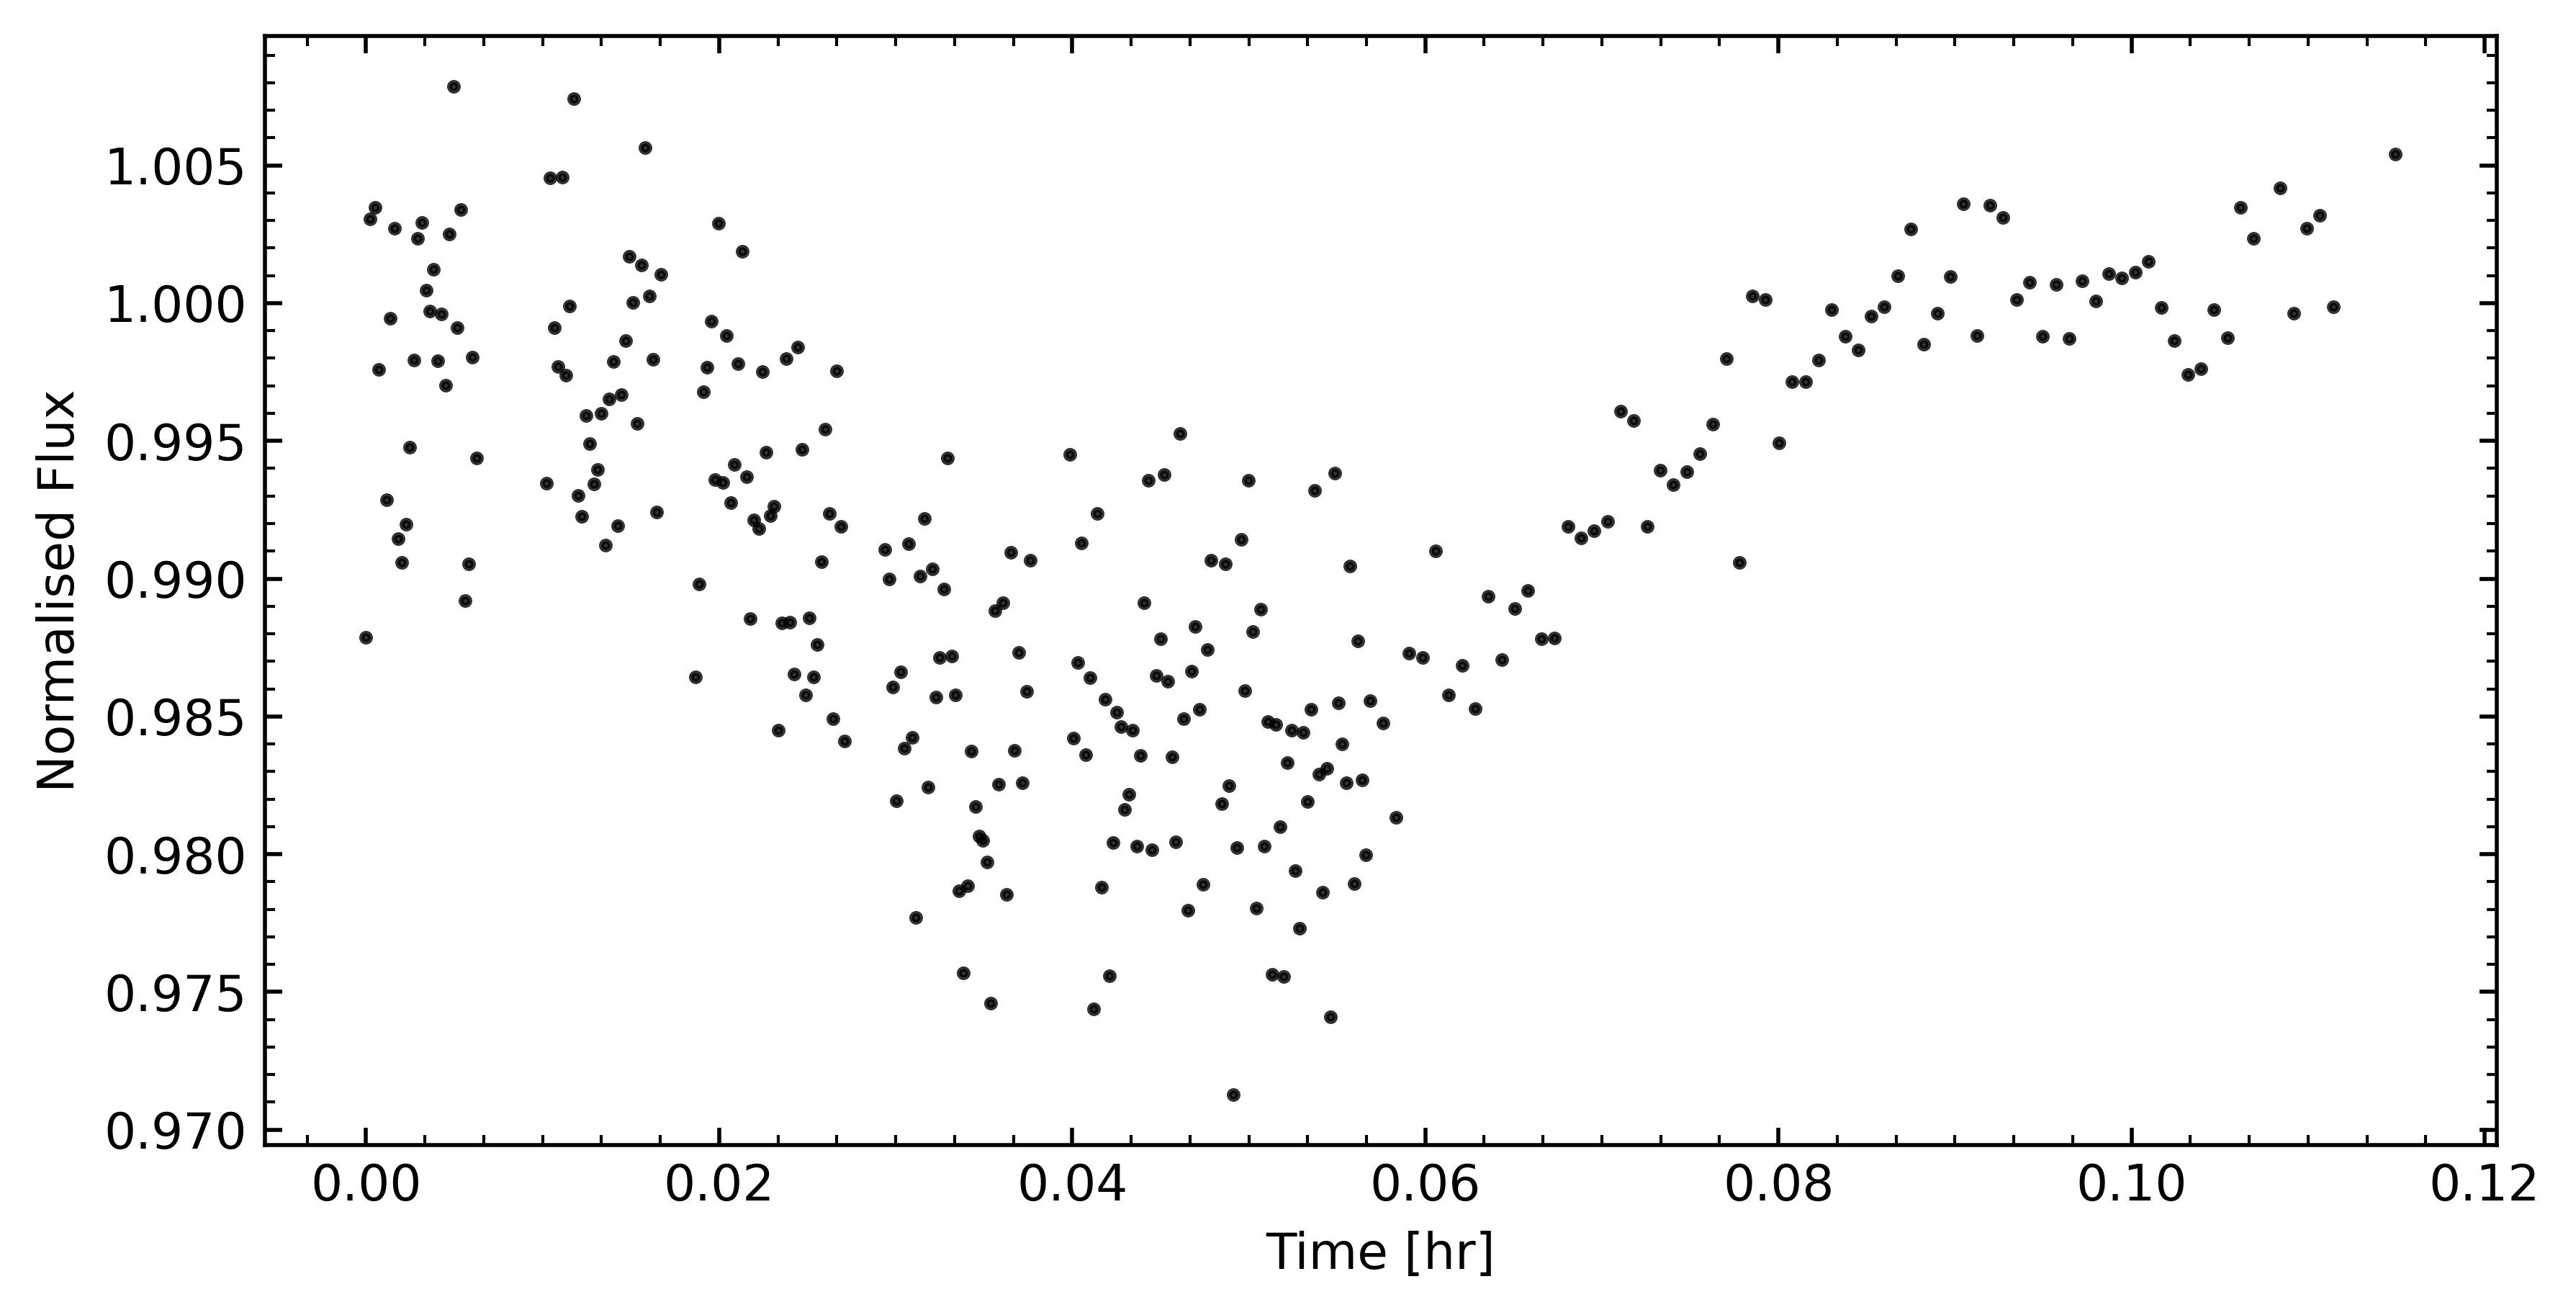

In [578]:
plt.figure(figsize=(8,4), dpi=500)
plt.scatter(dateL, fluxL, s=3, color='black', alpha=0.8)
#plt.errorbar(dateL, fluxL, yerr=fluxErrL, ecolor='black', elinewidth=0.5, alpha=0.8, capsize=1.5, 
#                linewidth=0)

plt.gca().tick_params(top=True, right=True, which='both', direction="in")
plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(6))
plt.gca().yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
plt.xlabel("Time [hr]")
plt.ylabel("Normalised Flux")
plt.show()

In [579]:
'''params = batman.TransitParams()           #object to store transit parameters
params.t0 = 1321686.902               #time of inferior conjunction (Julian Days)
params.per = 2.41                     #orbital period
params.rp = 0.1192                    #planet radius (in units of stellar radii)
params.a = 7.66689                    #semi-major axis (in units of stellar radii)
params.inc = 84.07                    #orbital inclination (in degrees)
params.ecc = 0.018                    #eccentricity ##Assuming circular orbit
params.w = 24.                        #longitude of periastron (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.45, 0.12]               #limb darkening coefficients [u1, u2, u3, u4]'''

'params = batman.TransitParams()           #object to store transit parameters\nparams.t0 = 1321686.902               #time of inferior conjunction (Julian Days)\nparams.per = 2.41                     #orbital period\nparams.rp = 0.1192                    #planet radius (in units of stellar radii)\nparams.a = 7.66689                    #semi-major axis (in units of stellar radii)\nparams.inc = 84.07                    #orbital inclination (in degrees)\nparams.ecc = 0.018                    #eccentricity ##Assuming circular orbit\nparams.w = 24.                        #longitude of periastron (in degrees)\nparams.limb_dark = "quadratic"        #limb darkening model\nparams.u = [0.45, 0.12]               #limb darkening coefficients [u1, u2, u3, u4]'

## BATMAN Example Parameters

Time of inferior conjunction (t$_{0}$) = 0
<br>
Obrital Period = 1
<br>
R$_{\text{planet}}$ = 0.1 R$_{\odot}$
<br>
Semi-radius (a) = 15 R$_{\odot}$
<br>
Orbital inc = 87$^{\circ}$
<br>
Eccentricity ($e$) = 0
<br>
Longitude of periastron ($\omega$) = 90$^{\circ}$
<br>
Limb Darkening Model = Nonlinear
<br>
Limb Darkening Coeffs. (u$_{\text{n}}$) = [0.5, 0.1, 0.1, -0.1]

## Kipping & Bakos (2011) Model Parameters

Time of inferior conjunction (days) (t$_{0}$) = 2454849  &emsp; ##Not sure what this parameter is or it's units
<br>
Obrital Period = 2.4706
<br>
R$_{\text{planet}}$ = 0.1192 R$_{\odot}$
<br>
Semi-radius (a) = 8.06 R$_{*}^{-1}$
<br>
Orbital inc = 84.07$^{\circ}$
<br>
Eccentricity ($e$) = 0.018
<br>
Longitude of periastron ($\omega$) = 24$^{\circ}$
<br>
Limb Darkening Model = Quadratic
<br>
Limb Darkening Coeffs. (u$_{\text{n}}$) = [0.45, 0.12]

In [811]:
def ReduChi2(params, x, y, yerr, paramList, consts, constsList, residuals=False, model=False):
    '''try:
        len(obs)==len(exp)
    except:
        print("The Observed and Expected values do not have same size")'''
    
    exp = fluxModel(x, params, paramList, consts, constsList)
    resd = y - exp
    chi2 = np.sum((resd**2)/(yerr**2))#/(len(y)-len(params))
    
    if residuals:
        return resd, chi2
    
    elif model:
        return exp, resd, chi2
    
    else:
        return chi2

In [812]:
def fluxModel(x, par, paramList, consts, constsList, baseline=0.):
    params = batman.TransitParams()
    
    valuesL = [par, consts]
    keysL = [paramList, constsList]
    u = np.zeros((2))
    
    for i in range(len(valuesL)):
        for value, key in zip(valuesL[i], keysL[i]):
            if key == 't0':
                params.t0 = value

            elif key == 'per':
                params.per = value

            elif key == 'rp':
                params.rp = value

            elif key == 'a':
                params.a = value

            elif key == 'inc':
                params.inc = value

            elif key == 'ecc':
                params.ecc = value

            elif key == 'w':
                params.w = value
            
            elif key == 'u1':
                #value = round(value, 2)
                u[0] = value
            
            elif key == 'u2':
                #value = round(value, 2)
                u[1] = value
            
            #elif key == 'u3':
            #    u[2] = value
            
            #elif key == 'u4':
            #    u[3] = value
                
            else:
                print("{} parameter not recognised".format(key))
            
            params.u = u
            
            if len(u) == 0:
                params.limb_dark = "uniform"
            
            if len(u) == 1:
                params.limb_dark = "linear"
                
            if len(u) == 2:
                params.limb_dark = "quadratic"
            
            if len(u) == 4:
                params.limb_dark = "nonlinear"
    
    m = batman.TransitModel(params, x)
    flux_model = m.light_curve(params)
    
    return (np.array(flux_model)+baseline)

## Using Least-Squares Method

### Finding Initial Guesses

Fix t$_{0}$, period, eccentricity and omega

### Set 1
rp: 0.11571067478489372 [0.1192]
<br>
a: -0.9567170808528711 [8.06]
<br>
inc: 87.0 [84.07]
<br>
u1: 0.0024707655744382203 [0]
<br>
u2: 0.913906399430532 [0.9]
<br>

Chi2: 1.2474996528566815

### Set 2
t0: 1387771.2460054897 [1321686.902]
<br>
rp: 0.11919999902877401 [0.1192]
<br>
a: 8.060000106789644 [8.06]
<br>
inc: 83.94999928231816 [83.95]
<br>
u1: 0.450000002649652 [0.45]
<br>
u2: 0.12000000040570004 [0.12]
<br>

Chi2: 1.3240625026169


In [813]:
dateL = np.load('DateL.npy')
bins = 6
c = 0
avgDate, avgFlux, avgFluxErr = fluxBin(dateL, fluxL, bins, c=c)
avgDate = np.array(avgDate)
avgFlux = np.array(avgFlux)
avgFluxErr = np.array(avgFluxErr)

In [814]:
per = 2.4441 #19543
guess = {
    "t0": 2453950.21875311, #2453950.22667325, 1321686.902
    #"per": per, 
    "rp": 0.1192, 
    "a": 8.06,
    "inc": 83.95, 
    #"ecc": 0.018, 
    #"w": 24., 
    "u1": 0.21, 
    "u2": 0.11,
}

bounds = {
    "t0": (1000000, 3000000),
    #"per": 2.41, 
    "rp": (None, None), 
    "a": (1, None),
    "inc": (0, 87), 
    #"ecc": 0.018, 
    #"w": 24., 
    "u1": (None,None),
    "u2": (None,None),
}

constants = {
    #"t0": 2453950.22667325+per, #2453950.250, 1320010
    "per": per, #2.3815063440, #2.41 
    #"rp": 0.12, 
    #"a": 8.06, 
    #"inc": 84, 
    "ecc": 0., 
    "w": 0., 
    #"u1": 0.9, 
    #"u2": 0.01,
}

guess_values = list(guess.values())
guess_label = list(guess.keys())
const_values = list(constants.values())
const_label = list(constants.keys())
bounds_values = list(bounds.values())

In [815]:
flux_model, resd, chi2 = ReduChi2(guess_values, avgDate, avgFlux, avgFluxErr,
                                  guess_label, const_values, const_label, model=True)
chi2

385.67144769138724

### Minimising using Reduced Chi2 Statistic

In [816]:
soln_params = spy.optimize.minimize(ReduChi2, np.array(guess_values), method='Nelder-Mead',
                                    args=(avgDate, avgFlux, avgFluxErr, guess_label, const_values, const_label), 
                                    bounds=bounds_values, 
                                    options={'return_all': True})

chi2 = soln_params.fun
flux_model, resd, chi2 = ReduChi2(soln_params.x, avgDate, avgFlux, avgFluxErr,
                                  guess_label, const_values, const_label, model=True)
#flux_model = fluxModel(avgDate, soln_params.x, guess_label, const_values, const_label)


for i, x in enumerate(soln_params.x):
    print("{}: {} [{}]".format(guess_label[i], x, guess_values[i]))
    
print("\nReduced Chi2: {}".format(chi2))

t0: 2453949.7680890253 [2453950.21875311]
rp: 0.11920000918552398 [0.1192]
a: 8.060001691136316 [8.06]
inc: 83.95000608564841 [83.95]
u1: 0.21000004689958474 [0.21]
u2: 0.1100000201980645 [0.11]

Reduced Chi2: 42.533060606347846


In [802]:
Date_0 = 0.04911340483522508
avgDate -= Date_0
avgDate *= 24

dateL -= Date_0
dateL *= 24

### Plotting the Parameters to Visualise

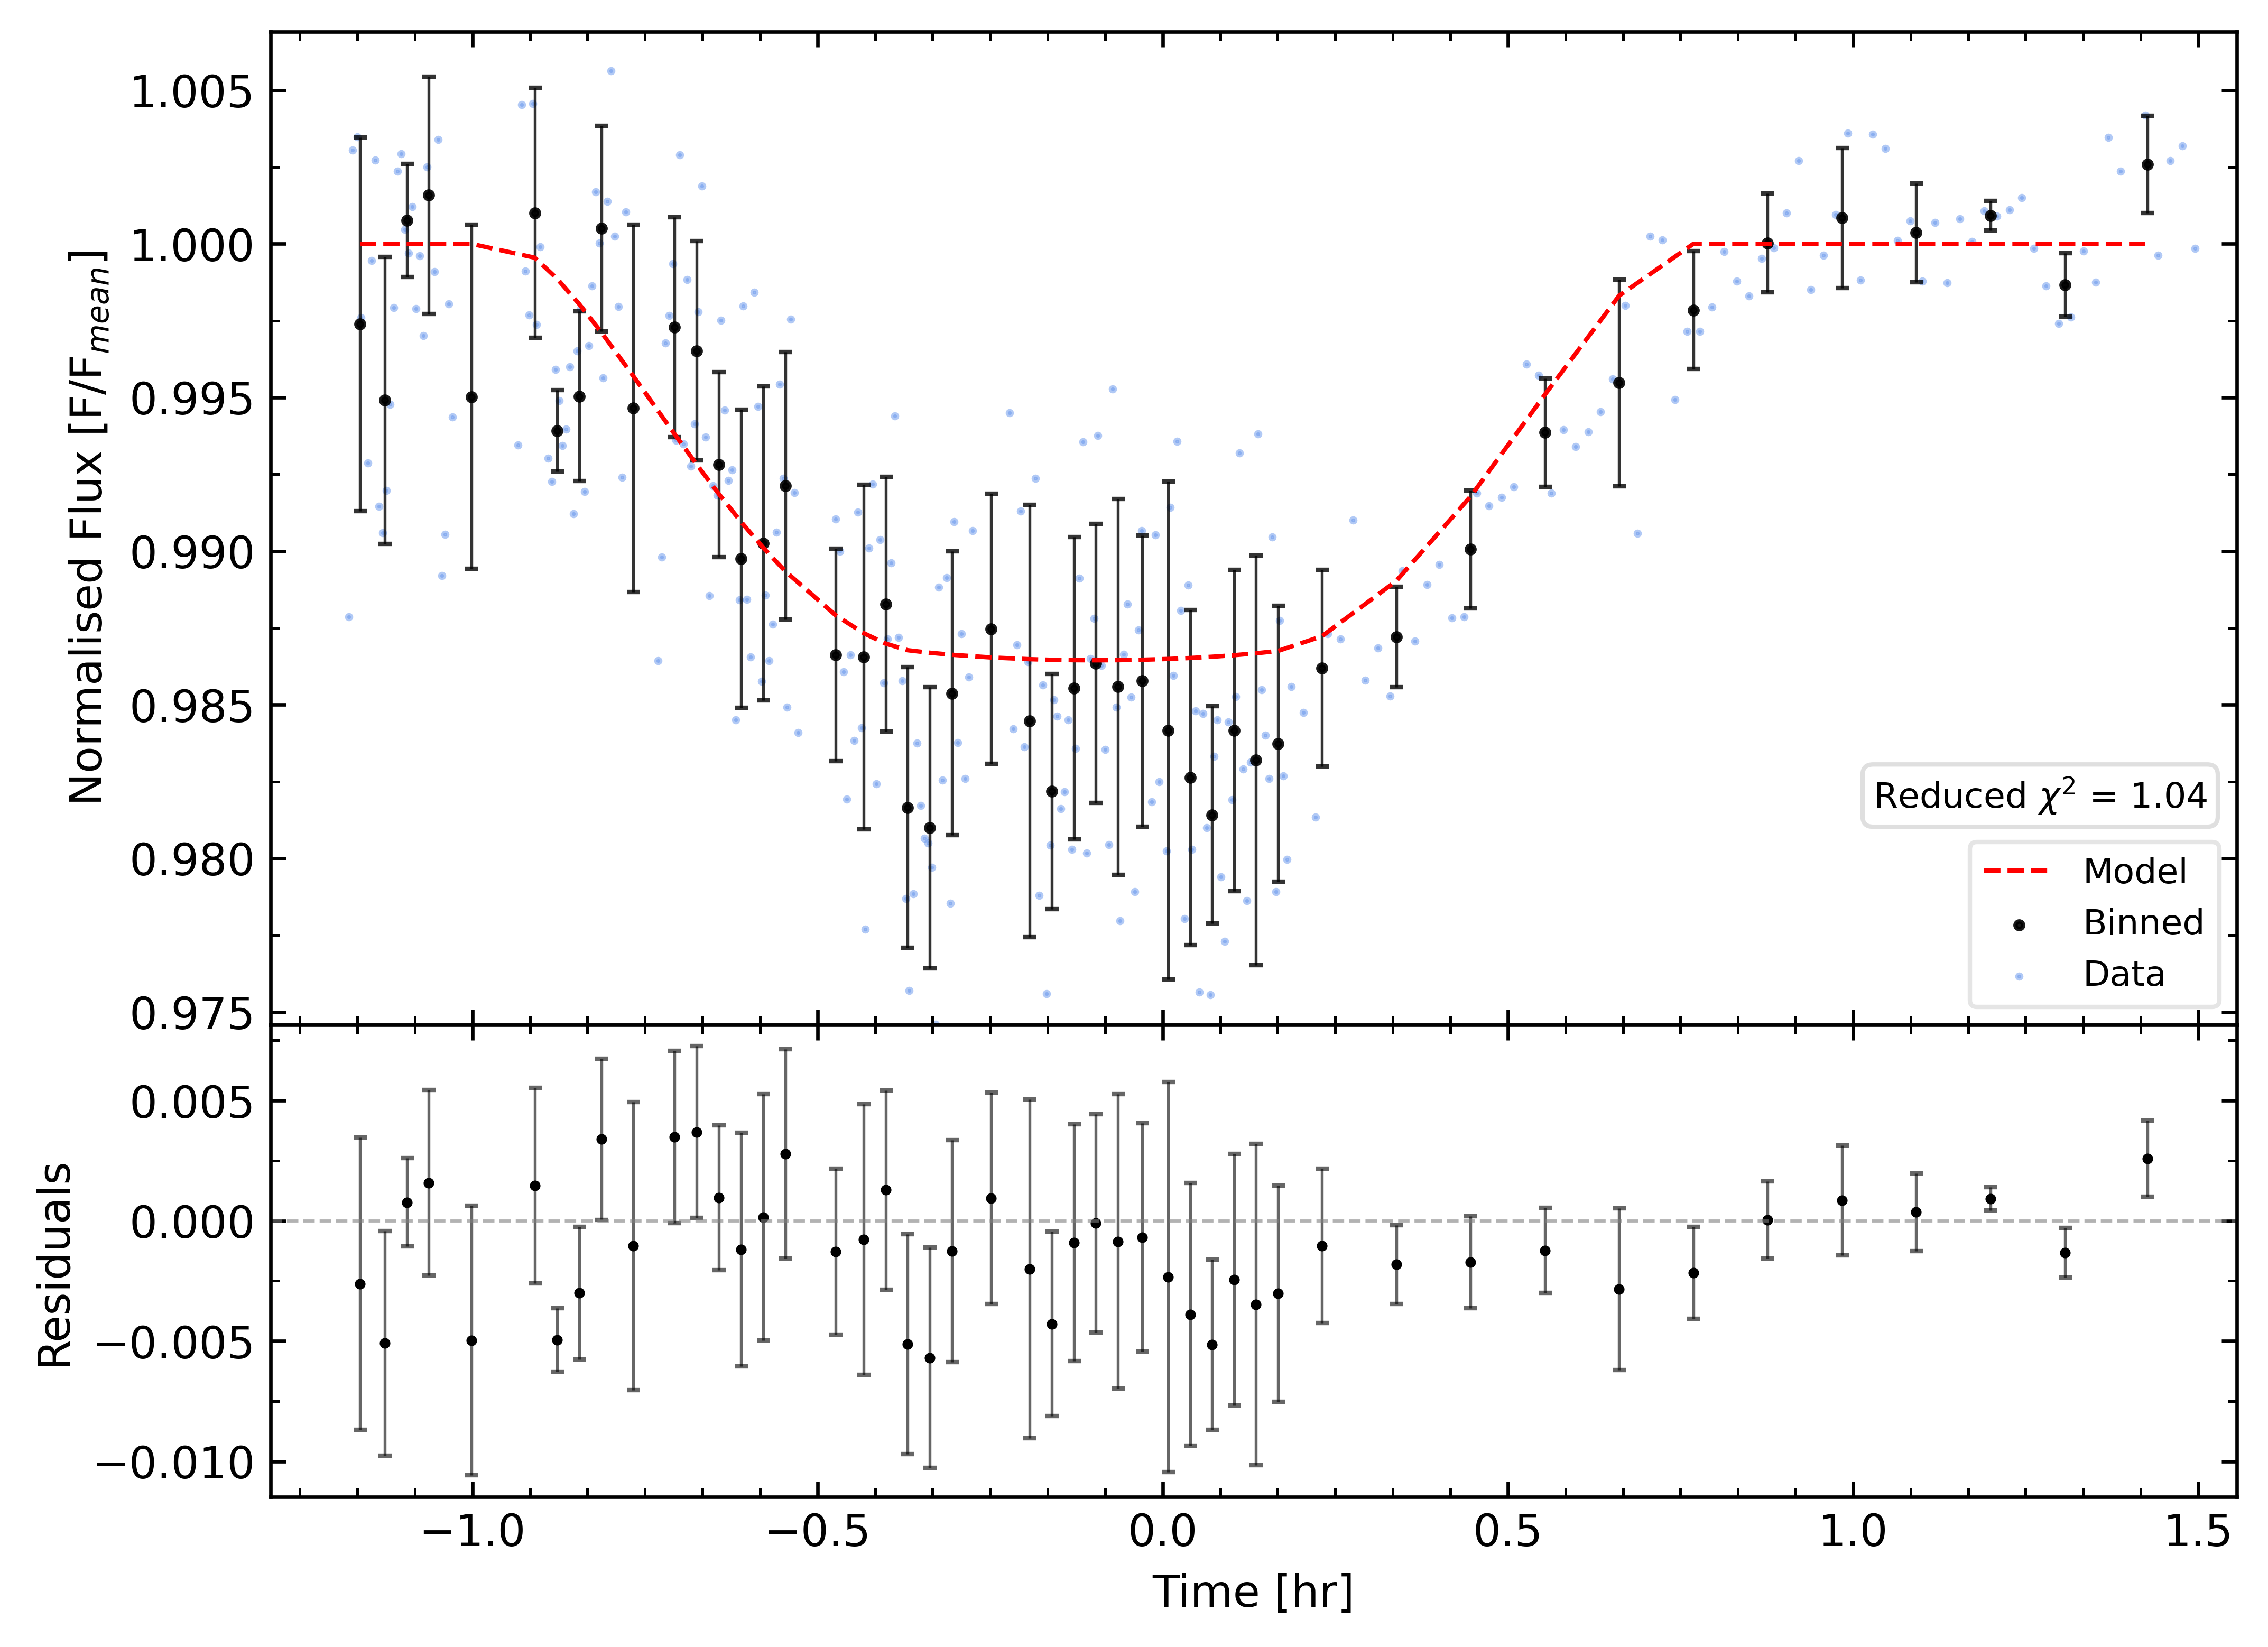

In [803]:
fig = plt.figure(figsize=(8,6), dpi=600) 
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2,0.95])
axs = gs.subplots(sharex=True)

# Plot1
axs[0].scatter(avgDate, avgFlux, s=3, color='black', alpha=0.9, label='Binned', zorder=2)
axs[0].errorbar(avgDate, avgFlux, yerr=avgFluxErr, ecolor='black', elinewidth=0.65, alpha=0.8, capsize=1.5, 
                linewidth=0, zorder=1)
axs[0].plot(avgDate, flux_model, color='red', linestyle='--', linewidth='1', label='Model', zorder=3)
xlims = axs[0].set_xlim()
ylims = axs[0].set_ylim()

axs[0].scatter(dateL, fluxL, s=3, marker='.', color='cornflowerblue', alpha=0.5, label='Data', zorder=0)

axs[0].tick_params(top=True, right=True, which='both', direction="in")
axs[0].set(ylabel=r"Normalised Flux [F/F$_{mean}$]")
axs[0].xaxis.set_minor_locator(mtick.AutoMinorLocator(6))
axs[0].yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
axs[0].set_xlim(xlims)
axs[0].set_ylim(ylims)

handles, labels = axs[0].get_legend_handles_labels()
handles = [handles[1], handles[0], handles[2]]
labels = [labels[1], labels[0], labels[2]]
axs[0].legend(handles, labels, loc=4, framealpha=0.5, fontsize=8)

axs[0].text((xlims[1]-xlims[0])*0.985+xlims[0], (ylims[1]-ylims[0])*0.21+ylims[0], 
            r"Reduced $\chi^{2}$ = %.2f" % (chi2), fontsize=8, 
            bbox=dict(boxstyle="round", edgecolor="silver", facecolor="white", alpha=0.5),
            horizontalalignment='right', verticalalignment='bottom')

# Plot2
axs[1].scatter(avgDate, resd, s=2, color='black')
axs[1].errorbar(avgDate, resd, yerr=avgFluxErr, ecolor='black', elinewidth=0.65, alpha=0.6, capsize=1.5, linewidth=0)

axs[1].tick_params(top=True, right=True, which='both')
axs[1].axhline(y=0, color='grey', linestyle = '--', alpha=0.6, linewidth=0.7)
axs[1].set(ylabel="Residuals")
axs[1].tick_params(which="both", axis="x", direction="in")
axs[1].tick_params(which="both", axis="y", direction="in")
axs[1].yaxis.set_minor_locator(mtick.AutoMinorLocator(2))

plt.xlabel("Time [hr]")
plt.show()

In [817]:
allvecs = np.array(soln_params.allvecs)
OpParams = np.array(soln_params.x)

print(OpParams)
print(soln_params.fun)

[2.45394977e+06 1.19200009e-01 8.06000169e+00 8.39500061e+01
 2.10000047e-01 1.10000020e-01]
42.533060606347846


In [818]:
data = np.zeros((len(allvecs[0]), len(allvecs)))

pd.set_option('display.max_rows', None)
if len(allvecs[0]) > 1:
    for i in range(len(allvecs[0])):
        data[i] = np.hstack(allvecs[:,[i]])
else:
    data = np.hstack(allvecs[:,[0]])
    table = pd.DataFrame(data, index=guess_label).T

table = pd.DataFrame(data, index=guess_label).T
table

,t0,rp,a,inc,u1,u2
0,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
1,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
2,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
3,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
4,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
5,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
6,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
7,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
8,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11
9,2.453950e+06,0.1192,8.060000,83.950000,0.21,0.11


In [819]:
dateL = np.load('DateL.npy')
bins = 6
c = 0
avgDate, avgFlux, avgFluxErr = fluxBin(dateL, fluxL, bins, c=c)
avgDate = np.array(avgDate)
avgFlux = np.array(avgFlux)
avgFluxErr = np.array(avgFluxErr)

In [820]:
Opconst_values = np.append(OpParams, const_values)
Opconst_labels = guess_label + const_label

Opconst_values

array([2.45394977e+06, 1.19200009e-01, 8.06000169e+00, 8.39500061e+01,
       2.10000047e-01, 1.10000020e-01, 2.44410000e+00, 0.00000000e+00,
       0.00000000e+00])

In [821]:
change_val = np.array([-3, -2, -1, 0, +1, +2, +3])

In [822]:
x_dataL = []
y_dataL = []
for i, x in enumerate(OpParams[1:]):
    chi2 = []
    shiftL = np.zeros(len(change_val))
    if i == 0:
        shiftL = np.arange(-1, 22, 1)*0.001
        
    elif i == 1:
        shiftL = np.arange(-2, 2, 1)
        
    elif i == 2:
        shiftL = np.arange(-2, 3, 1)
        
    elif i == 3:
        shiftL = np.arange(-15, 5, 1)*0.1
        
    elif i == 4:
        shiftL = np.arange(-15, 3, 1)*0.1

    for shift in shiftL:
        Opconst_values = np.append(OpParams, const_values)
        Opconst_values[i+1] = x+shift
        chi2 += [ReduChi2([], avgDate, avgFlux, avgFluxErr, [], Opconst_values, Opconst_labels)]
    
    print(shiftL+x)
    
    x_dataL += [shiftL+x]
    y_dataL += [chi2]

[0.11820001 0.11920001 0.12020001 0.12120001 0.12220001 0.12320001
 0.12420001 0.12520001 0.12620001 0.12720001 0.12820001 0.12920001
 0.13020001 0.13120001 0.13220001 0.13320001 0.13420001 0.13520001
 0.13620001 0.13720001 0.13820001 0.13920001 0.14020001]
[6.06000169 7.06000169 8.06000169 9.06000169]
[81.95000609 82.95000609 83.95000609 84.95000609 85.95000609]
[-1.28999995 -1.18999995 -1.08999995 -0.98999995 -0.88999995 -0.78999995
 -0.68999995 -0.58999995 -0.48999995 -0.38999995 -0.28999995 -0.18999995
 -0.08999995  0.01000005  0.11000005  0.21000005  0.31000005  0.41000005
  0.51000005  0.61000005]
[-1.38999998 -1.28999998 -1.18999998 -1.08999998 -0.98999998 -0.88999998
 -0.78999998 -0.68999998 -0.58999998 -0.48999998 -0.38999998 -0.28999998
 -0.18999998 -0.08999998  0.01000002  0.11000002  0.21000002  0.31000002]


In [ ]:
0.11920001
8.06000169 #7.85

83.95000609 84.2
-0.28999995
-0.48999998

In [825]:
cuts = np.array([[0.11920001, 0.13920001],
    [7.65, 8.06000169],
    [83.95000609, 84.58],
    [-0.91, 0.21000005],
    [-1.08999998, 0.11000002]])

yendcut = [45, 50, 50, 45, 43]
place_ticks = np.array([2, 5, 5, 2, 2])

In [831]:
kL = [0.12920001, 7.85, 84.2, 0.11000005, -0.48999998]#-0.28999995
for k, cut in zip(kL, cuts):
    print(k, cut[0], cut[1])
    print(k-cut[0], cut[1]-k)

0.12920001 0.11920001 0.13920001
0.010000000000000009 0.010000000000000009
7.85 7.65 8.06000169
0.1999999999999993 0.21000169000000035
84.2 83.95000609 84.58
0.2499939100000006 0.37999999999999545
0.11000005 -0.91 0.21000005
1.02000005 0.09999999999999999
-0.48999998 -1.08999998 0.11000002
0.6 0.6


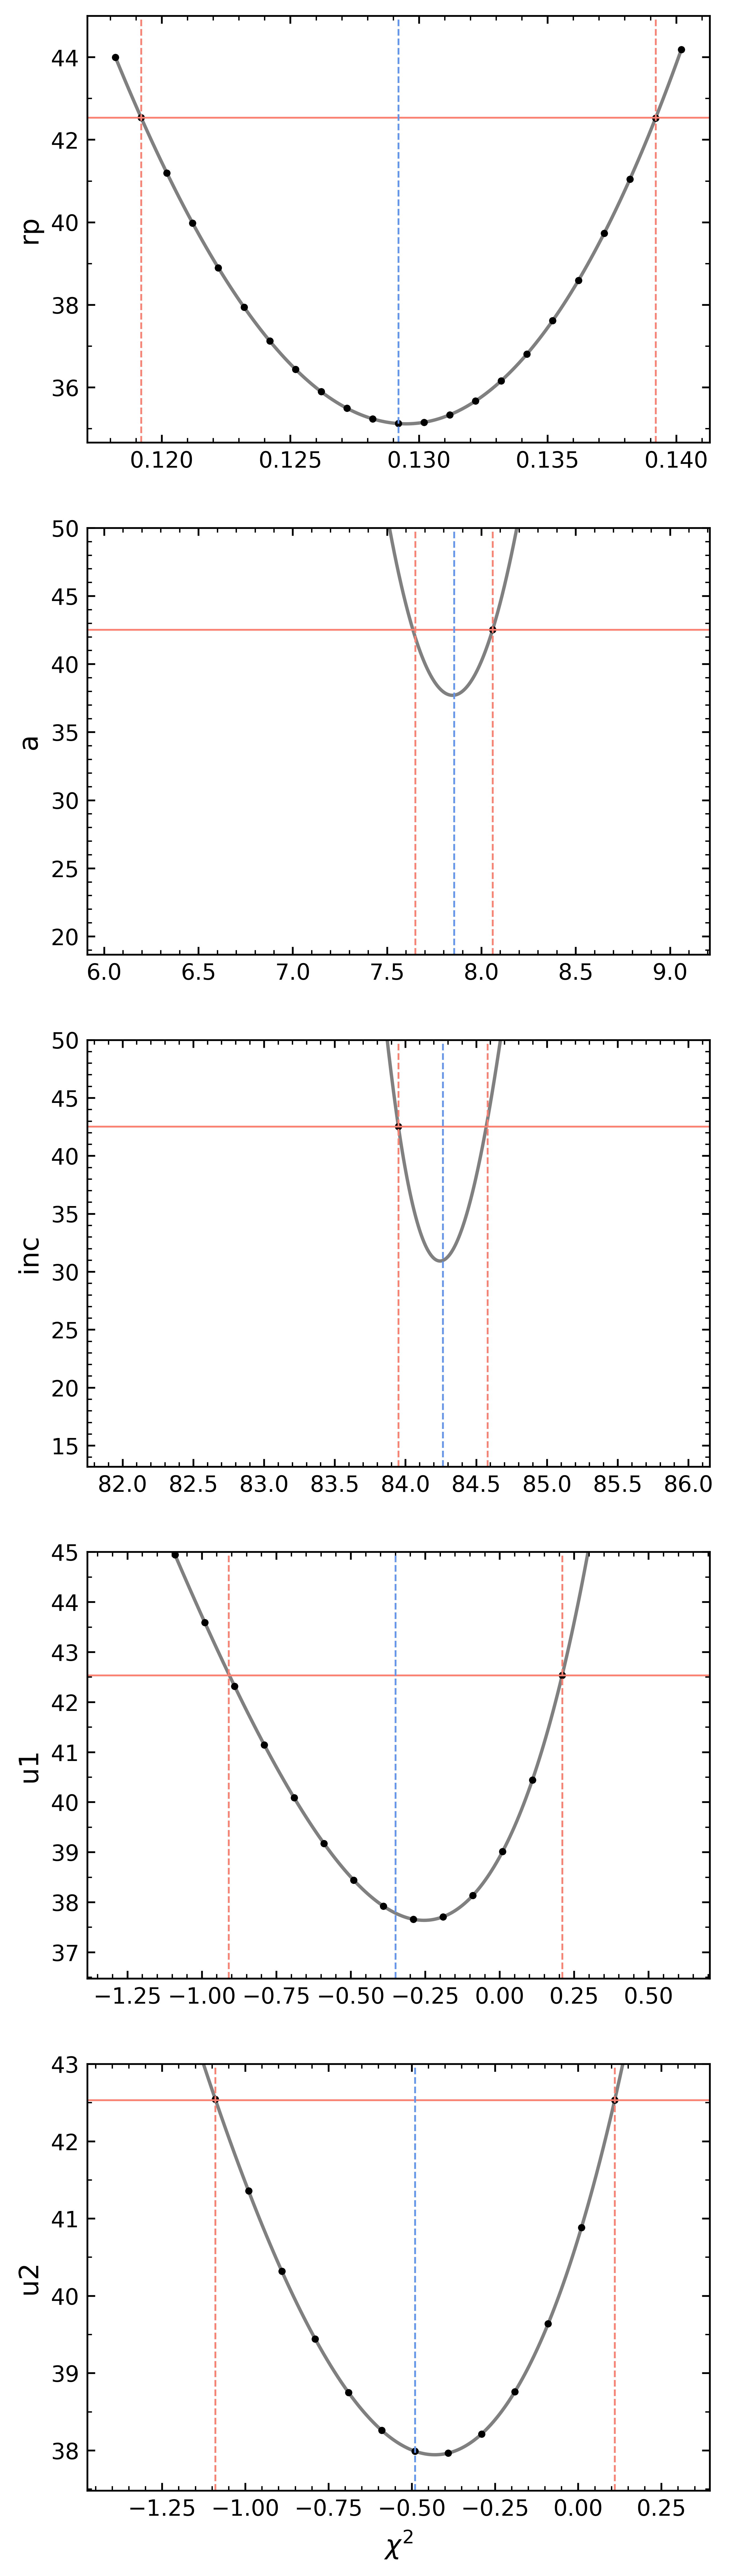

In [826]:
fig, axes = plt.subplots(5, 1, figsize = (5,20), dpi =600, sharey=False)
for x, y, label, cut, pltick, yend, ax in zip(x_dataL, y_dataL, guess_label[1:], cuts, place_ticks, yendcut, 
                                                 axes.flatten()):
    
    x_y_spline = make_interp_spline(x, y)
    x_ = np.linspace(x.min(), x.max(), 500)
    y_ = x_y_spline(x_)

    ax.scatter(x, y, s = 5, zorder=2, c='black')
    ax.plot(x_, y_, zorder=1, c='grey')
    
    ax.set_ylabel('{}'.format(label), fontsize=12)
    ax.tick_params(top=True, right=True, which='both')
    ax.tick_params(which="both", axis="x", direction="in")
    ax.tick_params(which="both", axis="y", direction="in")
    
    ax.axhline(y=soln_params.fun, color='salmon', linewidth=0.8)
    ax.axvline(x=cut[0], color='salmon', linestyle = '--', linewidth=0.8)
    ax.axvline(x=cut[1], color='salmon', linestyle = '--', linewidth=0.8)
    ax.axvline(x=(cut[1]+cut[0])/2, color='cornflowerblue', linestyle = '--', linewidth=0.8)
    
    ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(pltick))
    
    ylims = ax.set_ylim()
    ax.set_ylim(ylims[0], yend)
    
plt.xlabel('$\chi^2$', fontsize=12)
plt.show()

In [ ]:
for ax in axes.flatten(), x_data:
    
x_data = shiftL+x
y_data = chi2
    _
x_y_spline = make_interp_spline(x_data, y_data)
x_ = np.linspace(x_data.min(), x_data.max(), 500)
y_ = x_y_spline(x_)
plt.plot(x_, y_)
plt.axhline(y=soln_params.fun, color='grey', linestyle = '--', alpha=0.6, linewidth=0.7)
axs[0, 1].axvline(x = 2.4195, color='salmon', linestyle = '--')
axs[0, 1].axvline(x = 2.4675, color='salmon', linestyle = '--')
    
plt.scatter(shiftL+x, chi2)